In [143]:
## Enter your full name ##
name = 'Behzad Moloudi'
grade = 0

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import io
import requests
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
# Load the dataset

# URL to the dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

# Download the dataset as a zip file
response = requests.get(data_url)

# Open the downloaded zip file in memory
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Read the CSV file inside the zip archive into a pandas DataFrame
data_path = 'bank-additional/bank-additional-full.csv'
df = pd.read_csv(zip_file.open(data_path), sep=';')  # Read the CSV file into a DataFrame

# Display the first few rows of the dataset to check if it has been loaded correctly
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Explore the data

# Show data types, column names, and if there are any missing values
df.info()

# Show summary statistics (average, minimum, maximum) for numerical columns
df.describe()

# Check if there are any missing values in the dataset
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
# Handle missing values (e.g., replace missing values with the mean of the column)

# Handling 'unknown' values in categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Replace 'unknown' in each categorical column with the most frequent value (mode)
for col in categorical_columns:
    df[col] = df[col].replace('unknown', df[col].mode()[0])

# Check if 'unknown' has been handled
df[categorical_columns].isnull().sum()


# Step 1: Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Check for missing values in the numerical columns before applying the fillna operation
missing_values = df[numerical_cols].isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Step 3: Fill missing values only in columns that have missing data
numerical_cols_with_missing = missing_values[missing_values > 0].index
df[numerical_cols_with_missing] = df[numerical_cols_with_missing].apply(lambda col: col.fillna(col.mean()))

# Step 4: Confirm that missing values have been handled
print(df[numerical_cols_with_missing].isnull().sum())  # Check if all missing values are filled



Columns with missing values:
Series([], dtype: int64)
Series([], dtype: float64)


In [8]:
# Split data into training and testing sets

# 1. Separate features (X) and target (y)
X = df.drop('y', axis=1)  # X contains all columns except the target column 'y'
y = df['y']  # y contains the target column (whether the customer subscribed)

# 2. Split the preprocessed data into training and testing sets
# 80% of the data is used for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Check the shape of the training and testing sets
print(X_train.shape)  # Shape of X_train (features used for training)
print(X_test.shape)   # Shape of X_test (features used for testing)
print(y_train.shape)  # Shape of y_train (target for training)
print(y_test.shape)   # Shape of y_test (target for testing)


(32950, 20)
(8238, 20)
(32950,)
(8238,)


In [9]:
# Encoding categorical features (e.g., one-hot encoding)

# One-Hot Encoding for categorical columns

# Step 1: Convert all boolean columns to integers (0 or 1)
# This converts boolean columns to numeric format for compatibility with the models
X_train = X_train.astype({col: int for col in X_train.select_dtypes(include='bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes(include='bool').columns})

# Step 2: One-Hot Encoding for all object columns (categorical features)
# Get all the columns that have object data types (categorical)
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Perform One-Hot Encoding for these categorical columns
# drop_first=True helps to avoid multicollinearity (dummy variable trap)
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Step 3: Align the columns in training and testing sets
# This ensures that both training and testing datasets have the same columns after encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Step 4: Check the data types and ensure all columns are numeric
print(X_train.dtypes)  # This will confirm that all columns are numeric
print(X_test.dtypes)

# Display the first few rows of the encoded training data for verification
X_train.head()

# Step 5: Confirm that no columns are of object type anymore
remaining_categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Remaining categorical columns:", remaining_categorical_cols)


age                                int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
job_blue-collar                     bool
job_entrepreneur                    bool
job_housemaid                       bool
job_management                      bool
job_retired                         bool
job_self-employed                   bool
job_services                        bool
job_student                         bool
job_technician                      bool
job_unemployed                      bool
marital_married                     bool
marital_single                      bool
education_basic.6y                  bool
education_basic.9y                  bool
education_high.s

In [10]:
# Data Scaling (normalize numerical features)

# List of numerical columns that need scaling
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features in both training and testing sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Display the first few rows of the scaled data
X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
12556,-0.001669,-0.631114,-0.206242,0.194661,-0.350902,0.838794,0.589080,-0.472769,0.771354,0.843165,...,False,False,False,False,True,False,False,False,True,False
35451,-0.864095,-0.546321,0.513676,0.194661,-0.350902,-1.199440,-1.180760,-1.229916,-1.372028,-0.939748,...,True,False,False,False,True,False,False,False,True,False
30592,1.819007,-0.943306,1.233593,0.194661,1.677559,-1.199440,-1.180760,-1.229916,-1.308581,-0.939748,...,True,False,False,False,True,False,False,False,False,False
17914,0.285806,-0.631114,0.873635,0.194661,-0.350902,0.838794,0.589080,-0.472769,0.771930,0.843165,...,False,False,False,False,False,False,True,False,True,False
3315,-0.097494,0.332441,-0.206242,0.194661,-0.350902,0.647709,0.720307,0.890097,0.713674,0.330405,...,True,False,False,False,False,True,False,False,True,False


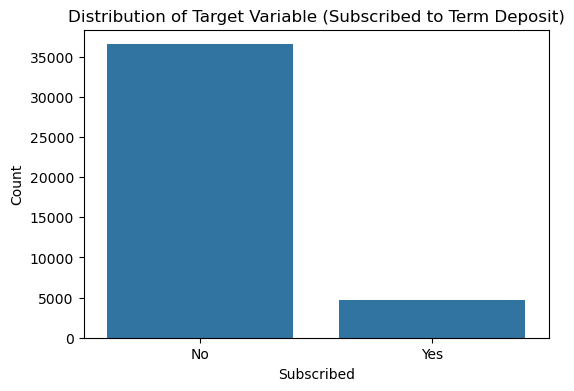

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (Subscribed to Term Deposit)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()


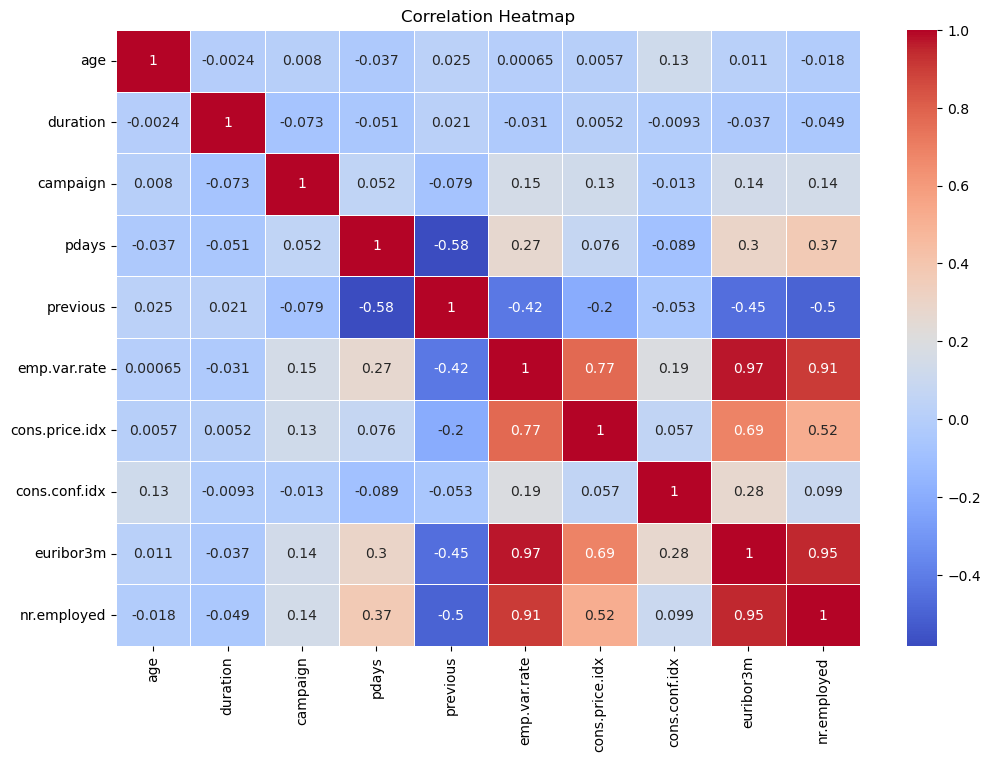

In [12]:
# Data Visualization (e.g., histograms, box plots, and correlation matrices)

# the size of the heatmap
plt.figure(figsize=(12, 8))

# Create a correlation matrix
corr_matrix = X_train[numerical_cols].corr()

# Plot the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



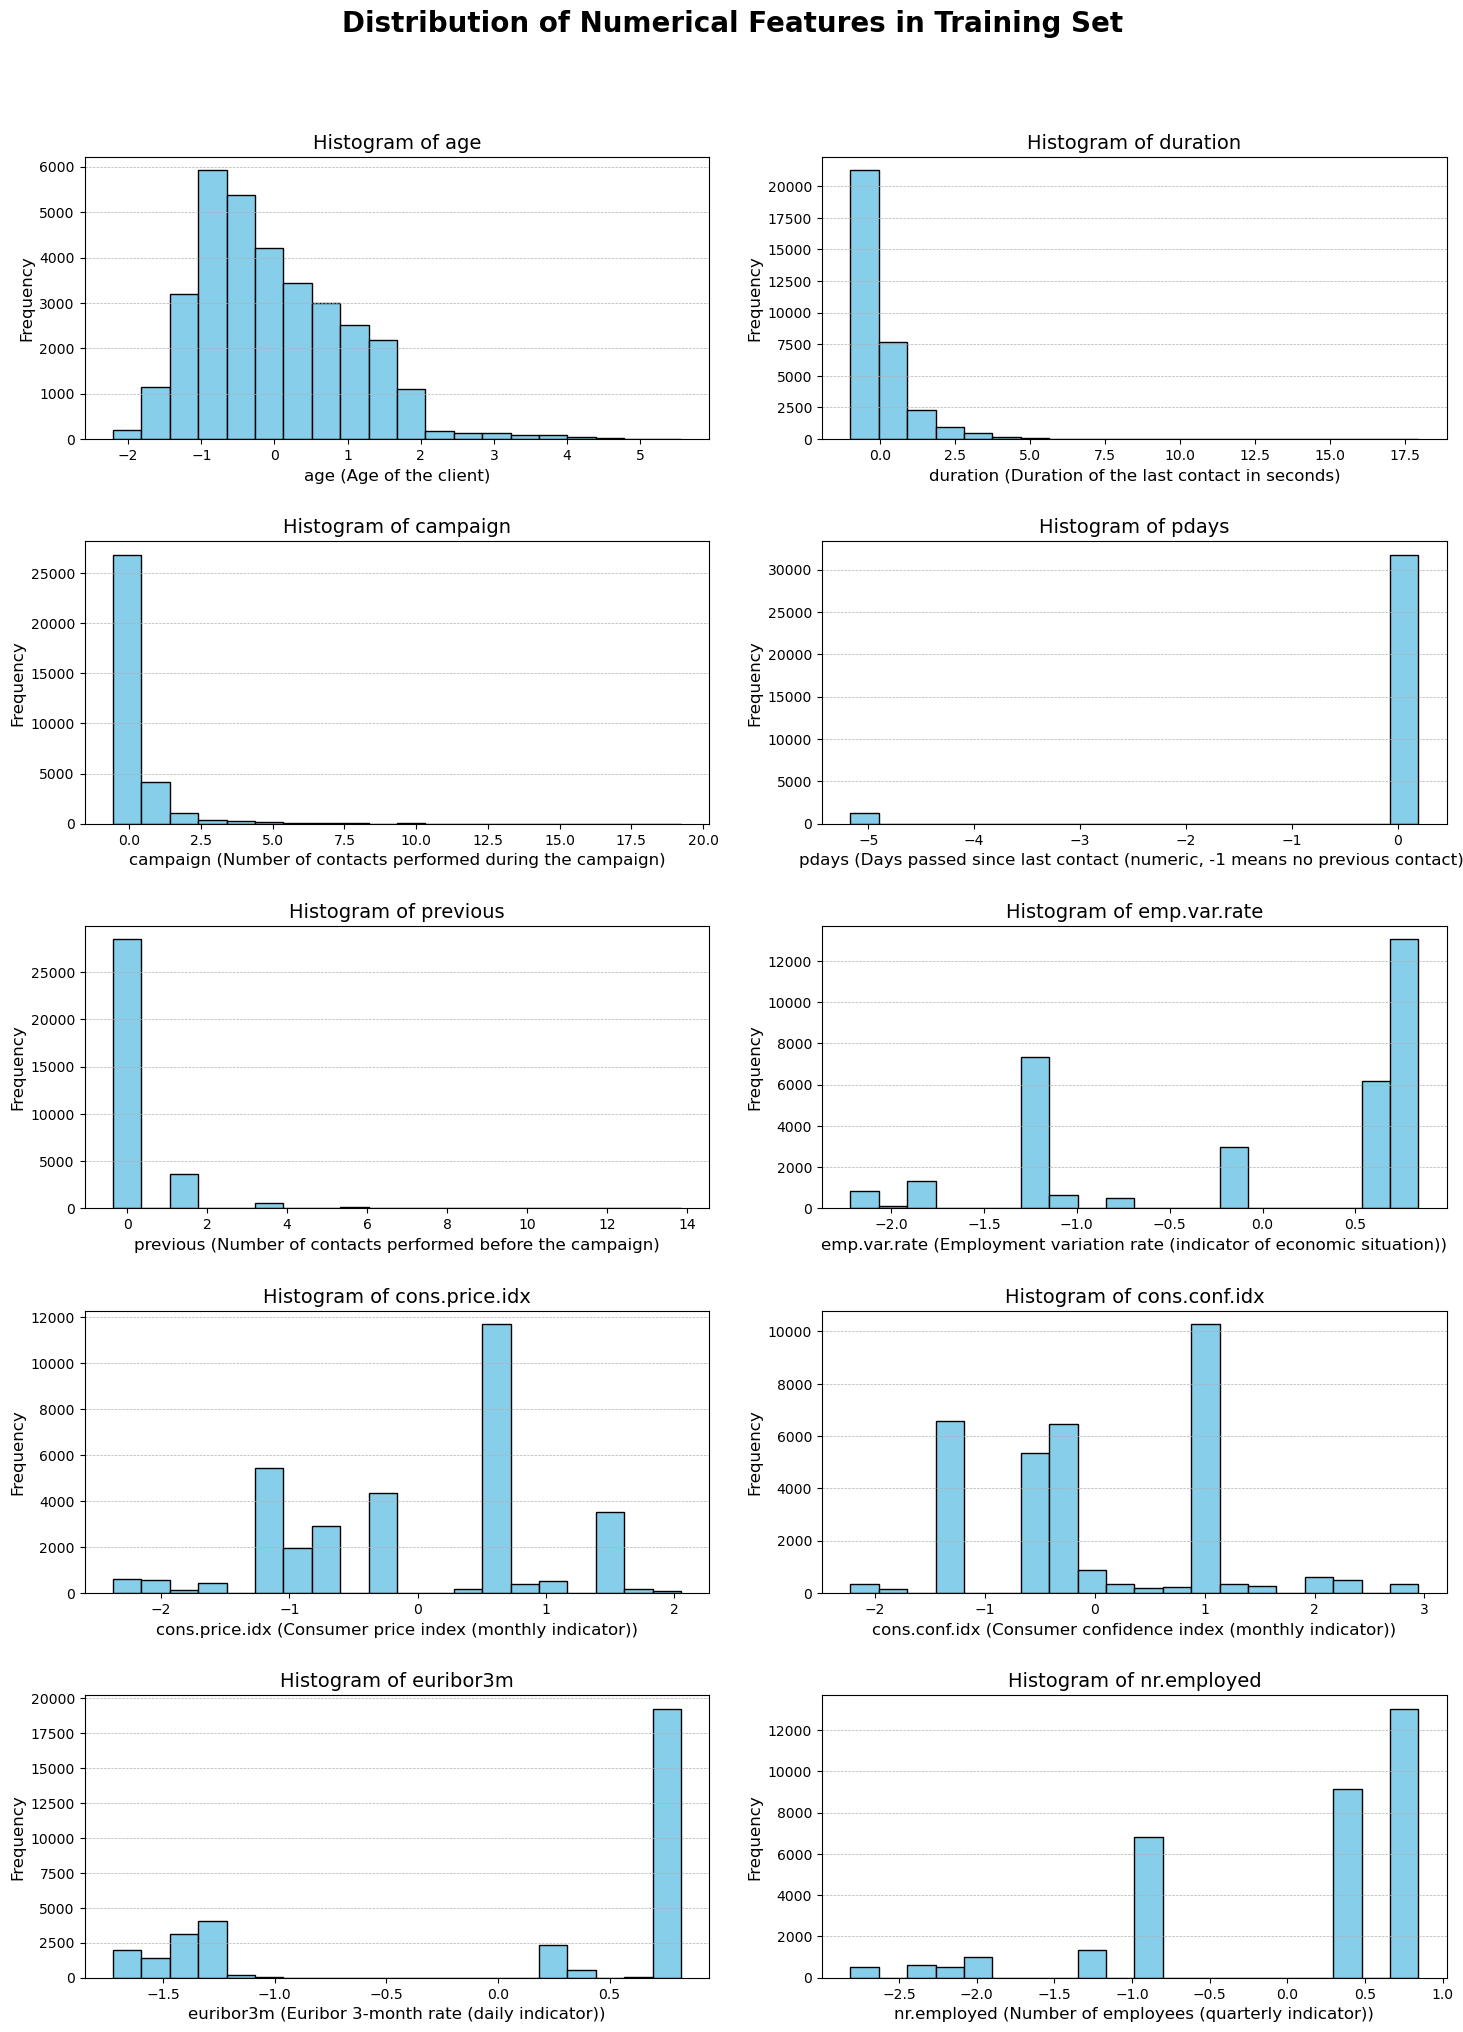

In [23]:
# Plot histograms for the numerical columns

# Short descriptions for each numerical column
numerical_descriptions = {
    'age': 'Age of the client',
    'duration': 'Duration of the last contact in seconds',
    'campaign': 'Number of contacts performed during the campaign',
    'pdays': 'Days passed since last contact (numeric, -1 means no previous contact)',
    'previous': 'Number of contacts performed before the campaign',
    'emp.var.rate': 'Employment variation rate (indicator of economic situation)',
    'cons.price.idx': 'Consumer price index (monthly indicator)',
    'cons.conf.idx': 'Consumer confidence index (monthly indicator)',
    'euribor3m': 'Euribor 3-month rate (daily indicator)',
    'nr.employed': 'Number of employees (quarterly indicator)'
}

# Plot histograms for each numerical column
fig, axes = plt.subplots(len(numerical_cols) // 2, 2, figsize=(15, 20))  # Create subplots for better arrangement
fig.suptitle('Distribution of Numerical Features in Training Set', fontsize=20, fontweight='bold', y=1.02)

axes = axes.flatten()  # Flatten axes to easily iterate over them

for i, col in enumerate(numerical_cols):
    axes[i].hist(X_train[col], bins=20, color='skyblue', edgecolor='black')  # Histogram for each numerical column
    axes[i].set_title(f'Histogram of {col}', fontsize=14)  # Adding a descriptive title for each column
    axes[i].set_xlabel(f"{col} ({numerical_descriptions[col]})", fontsize=12)  # Labeling x-axis with description
    axes[i].set_ylabel('Frequency', fontsize=12)  # Labeling y-axis
    axes[i].grid(axis='y', linestyle='--', linewidth=0.5)  # Adding grid lines for better readability

plt.tight_layout(pad=2.0, h_pad=2.5)  # Adjust layout to avoid overlapping
plt.show()


In [25]:
# Check data types of X_train and X_test
# Ensure all columns are numeric

print(X_train.dtypes)
print(X_test.dtypes)


age                              float64
duration                         float64
campaign                         float64
pdays                            float64
previous                         float64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
job_blue-collar                     bool
job_entrepreneur                    bool
job_housemaid                       bool
job_management                      bool
job_retired                         bool
job_self-employed                   bool
job_services                        bool
job_student                         bool
job_technician                      bool
job_unemployed                      bool
marital_married                     bool
marital_single                      bool
education_basic.6y                  bool
education_basic.9y                  bool
education_high.s

In [27]:
# Import necessary libraries for machine learning models and evaluation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the models with default settings
knn = KNeighborsClassifier(n_neighbors=5)  # KNN with 5 neighbors
logreg = LogisticRegression(max_iter=1000)  # Logistic Regression with more iterations to avoid convergence issues
decision_tree = DecisionTreeClassifier()  # Default Decision Tree Classifier

# Train each model on the training data
knn.fit(X_train, y_train)  # K-Nearest Neighbors
logreg.fit(X_train, y_train)  # Logistic Regression
decision_tree.fit(X_train, y_train)  # Decision Tree

# Evaluate the models on the test data
knn_predictions = knn.predict(X_test)  # KNN predictions
logreg_predictions = logreg.predict(X_test)  # Logistic Regression predictions
decision_tree_predictions = decision_tree.predict(X_test)  # Decision Tree predictions

# Get accuracy scores for all models
knn_accuracy = accuracy_score(y_test, knn_predictions)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

print(f"KNN Accuracy: {knn_accuracy:.2f}")
print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}")
print(f"Decision Tree Accuracy: {decision_tree_accuracy:.2f}")


KNN Accuracy: 0.90
Logistic Regression Accuracy: 0.91
Decision Tree Accuracy: 0.89


In [28]:
# Print classification reports
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

print("Decision Tree Classification Report:")
print(classification_report(y_test, decision_tree_predictions))


KNN Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.96      0.94      7303
         yes       0.58      0.45      0.51       935

    accuracy                           0.90      8238
   macro avg       0.76      0.70      0.73      8238
weighted avg       0.89      0.90      0.89      8238

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.66      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Decision Tree Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.93      0.94      7303
         yes       0.50      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.

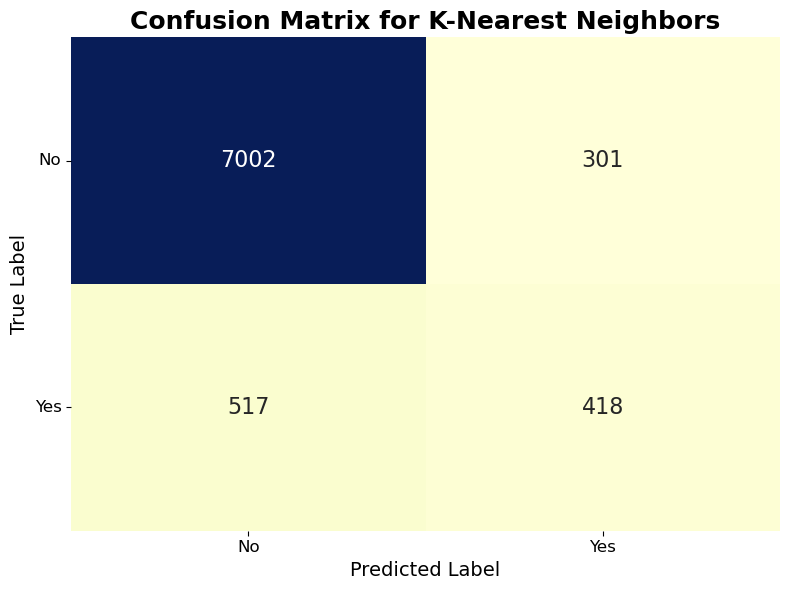

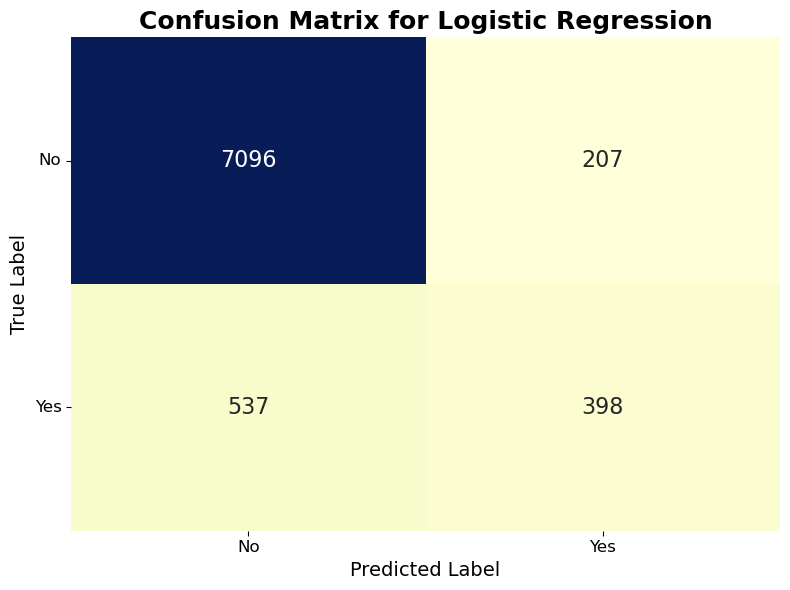

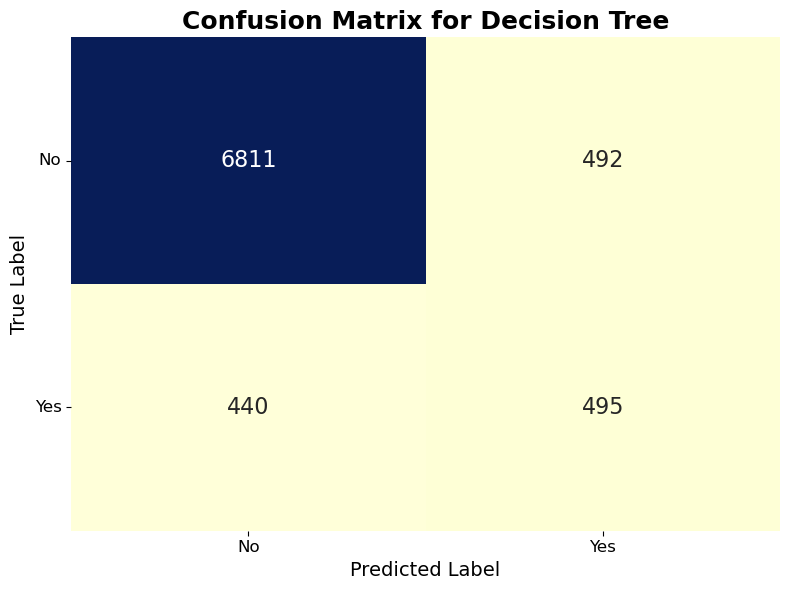

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(predictions, model_name, class_names=['No', 'Yes']):
    """
    Plots a labeled and styled confusion matrix.
    
    Parameters:
        predictions (array-like): Predictions from the model.
        model_name (str): Name of the model for the title.
        class_names (list): Names of the classes.
    """
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))  # Bigger figure size for readability
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False, annot_kws={"size": 16})
    
    # Add labels to the plot
    plt.title(f'Confusion Matrix for {model_name}', fontsize=18, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    
    # Set tick labels
    plt.xticks(ticks=[0.5, 1.5], labels=class_names, fontsize=12)
    plt.yticks(ticks=[0.5, 1.5], labels=class_names, fontsize=12, rotation=0)
    
    # Show the plot
    plt.tight_layout()  # Adjust the layout to avoid cutting off labels
    plt.show()

# Plot confusion matrices for each model with improved readability
plot_confusion_matrix(knn_predictions, "K-Nearest Neighbors")
plot_confusion_matrix(logreg_predictions, "Logistic Regression")
plot_confusion_matrix(decision_tree_predictions, "Decision Tree")
